# Multivariate Regression

Housing Price Prediction Problem. Suppose ‘Mr. X’ is planning to buy a house in Delhi and wants to predict the
price of the house given some features like number of bedrooms, number of bathrooms, area of the house, etc.
The file ’prob2data.csv’ contains a training set of housing prices in Delhi.
1. Read the excel file using pandas and perform data cleaning. Remove 1st column ’id’ which may not be
necessary here. Perform mean normalization of features. [1 Mark]
2. Write a Python code to perform multivariate regression to predict the house price. Consider all 5 columns
(‘bedrooms’,...,‘yr built’) as features. Implement batch gradient descent for optimization of weights. [4 Marks]
3. Predict the house price using the model, for 4 bedrooms, 2.5 bathrooms, 2570 sq. feet area, 2 floors, 2005 yr.
built, and state the difference between the model prediction and actual value (Rs. 719000). Show in % error.
[1 Mark]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from GD import BGD,SGD
import os
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
DATA_DIR = "Data"
SAVE_DIR = "Images"

we use os library to read the file so that we can read the file safely in windows and linux, without any error.

## Statement 1.
Read the excel file using pandas and perform data cleaning. Remove 1st column ’id’ which may not be
necessary here. Perform mean normalization of features

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR,'prob2data.csv'))
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,7129300520,221900.0,3,1.00,1180,1.0,1955
1,6414100192,538000.0,3,2.25,2570,2.0,1951


In [4]:
X  = df[['bedrooms','bathrooms','sqft_living','floors','yr_built']]
y = df['price']
X.head()

,bedrooms,bathrooms,sqft_living,floors,yr_built
0,3,1.00,1180,1.0,1955
1,3,2.25,2570,2.0,1951
2,2,1.00,770,1.0,1933
3,4,3.00,1960,1.0,1965
4,3,2.00,1680,1.0,1987


to convert the dataframe into numpy array we use `.values`

In [5]:
m = np.mean(X,axis=0)
m

bedrooms          3.370842
bathrooms         2.114757
sqft_living    2079.899736
floors            1.494309
yr_built       1971.005136
dtype: float64

In [6]:
mean = m.values # convert data frame into numpy array

In [7]:
max_x = np.max(X,axis=0).values
min_x = np.min(X,axis=0).values
mean == np.mean(X,axis=0).values
print("The mean of the data is: \n",mean)
print('\n')
print("The maximum value of the data is: \n",max_x)
print('\n')
print("The minimum value of the data is:\n ",min_x)

The mean of the data is: 
 [3.37084162e+00 2.11475732e+00 2.07989974e+03 1.49430898e+00
 1.97100514e+03]


The maximum value of the data is: 
 [3.300e+01 8.000e+00 1.354e+04 3.500e+00 2.015e+03]


The minimum value of the data is:
  [0.0e+00 0.0e+00 2.9e+02 1.0e+00 1.9e+03]


Mean Normalization

$$x_{norm} = \frac{x - \mu}{max(x)-min(x)}$$

<!-- where $\mu_i$ is the mean of the $i^{th}$ feature and $\sigma_i$ is the standard deviation of the $i^{th}$ feature. -->

In [8]:
X_norm = (X.values-mean)/(max_x-min_x)
y = y.values
print("The Mean Normalization of features is: \n ",X_norm)

The Mean Normalization of features is: 
  [[-0.01123762 -0.13934467 -0.06791696 -0.19772359 -0.13917509]
 [-0.01123762  0.01690533  0.0369887   0.20227641 -0.1739577 ]
 [-0.04154066 -0.13934467 -0.09886036 -0.19772359 -0.33047944]
 ...
 [-0.04154066 -0.17059467 -0.07999243  0.20227641  0.33039012]
 [-0.01123762  0.04815533 -0.03621885  0.20227641  0.28691186]
 [-0.04154066 -0.17059467 -0.07999243  0.20227641  0.32169447]]


## Statement 2.
Write a Python code to perform multivariate regression to predict the house price. Consider all 5 columns
(‘bedrooms’,...,‘yr built’) as features. Implement batch gradient descent for optimization of weights.

In [9]:
bgd = BGD(0.1,1000)

In [10]:
bgd.fit(X_norm,y)

In [11]:
bgd.b,bgd.w

(540182.1587933188,
 array([ 153488.96952534, 1191829.71931688, 1724041.77350765,
         204125.50632092, -378948.11202769]))

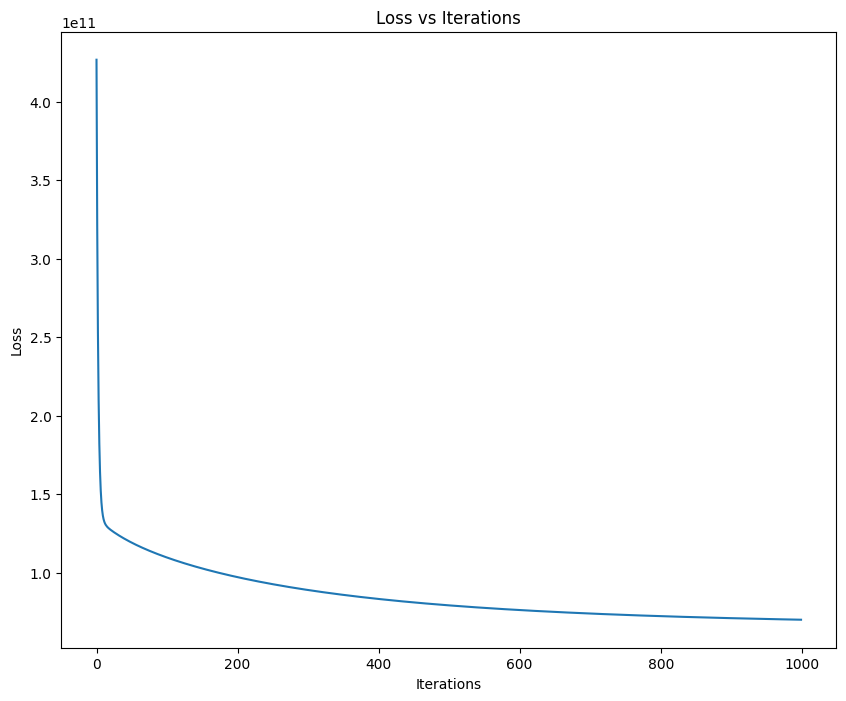

In [13]:
plt.plot(bgd.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.savefig(os.path.join(SAVE_DIR,'0201.png'))


## Statement 3.
Predict the house price using the model, for 4 bedrooms, 2.5 bathrooms, 2570 sq. feet area, 2 floors, 2005 yr.
built, and state the difference between the model prediction and actual value (Rs. 719000). Show in % error.

In [15]:
x_test = np.array([4,2.5,2570,2,2005])

In [16]:
x_test_norm = (x_test-mean)/(max_x-min_x)

In [17]:
x_test_norm

array([0.01906541, 0.04815533, 0.0369887 , 0.20227641, 0.29560751])

In [18]:
y_pred=bgd.predict(x_test_norm)
print("The predicted price of the house is: ",y_pred)

The predicted price of the house is:  593541.374305568


$$ \% error = \frac{actual - predicted}{actual} * 100 $$  

In [19]:
per_error = np.abs(((y_pred-719000)/719000)*100)
print(f"The percentage error is: {per_error:.2f}")

The percentage error is: 17.45


In [20]:
y_pred = bgd.predict(X_norm)
rmse = np.sqrt(np.mean((y_pred-y)**2))
print(f"The RMSE is: {rmse:.2f}")

The RMSE is: 264806.61
